# Production Planning Optimization

This notebook demonstrates a simple optimization model using Linear Programming (PuLP) to maximize profit for two products (A and B) under limited resources.

## Problem Setup
- Profit per unit:
  - Product A: $40
  - Product B: $30
- Resources required:
  - Labor: A=2 hrs, B=1 hr
  - Materials: A=1, B=1
- Resource availability:
  - Labor: 100 hrs
  - Materials: 80 units

## Objective
Maximize total profit while staying within labor and material constraints.


In [2]:
!pip install pulp
import pulp



   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.4 MB 4.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.8/16.4 MB 4.6 MB/s eta 0:00:04
   ------- -------------------------------- 2.9/16.4 MB 4.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.4 MB 4.9 MB/s eta 0:00:03
   ------------ --------------------------- 5.2/16.4 MB 5.1 MB/s eta 0:00:03
   --------------- ------------------------ 6.3/16.4 MB 5.1 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.4 MB 5.3 MB/s eta 0:00:02
   --------------------- ------------------ 8.9/16.4 MB 5.3 MB/s eta 0:00:02
   ------------------------ --------------- 10.0/16.4 MB 5.3 MB/s eta 0:00:02
   -------------------------- ------------- 11.0/16.4 MB 5.3 MB/s eta 0:00:02
   ----------------------------- ---------- 12.1/16.4 MB 5.3 MB/s eta 0:00:01
   -------------------------------- ------- 13.4/16.4 MB 5.4 MB/s eta 0:00:01
  

In [4]:
# Create LP problem (maximize profit)
model = pulp.LpProblem("Production_Planning", pulp.LpMaximize)

# Decision variables
x = pulp.LpVariable('Product_A', lowBound=0, cat='Continuous')
y = pulp.LpVariable('Product_B', lowBound=0, cat='Continuous')

# Objective function
model += 40*x + 30*y, "Total_Profit"

# Constraints
model += 2*x + y <= 100, "Labor_Constraint"
model += x + y <= 80, "Material_Constraint"

# Solve
model.solve()

# Display results
print("Status:", pulp.LpStatus[model.status])
print("Produce Product A:", x.varValue)
print("Produce Product B:", y.varValue)
print("Maximum Profit:", pulp.value(model.objective))


Status: Optimal
Produce Product A: 20.0
Produce Product B: 60.0
Maximum Profit: 2600.0


## Insights

- The model recommends the optimal production quantities for Products A and B.
- These values maximize total profit while respecting labor and material constraints.
- If more labor or raw materials become available, the maximum profit could increase further.


- Visualization Code

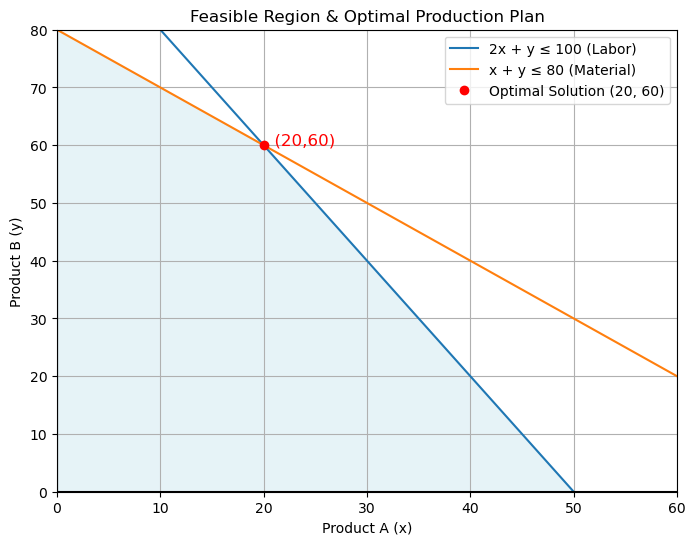

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Create range for plotting
x_vals = np.linspace(0, 60, 200)

# Constraints:
y1 = 100 - 2*x_vals        # from 2x + y <= 100
y2 = 80 - x_vals           # from x + y <= 80

# Feasible region (intersection of constraints)
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1, label=r'2x + y ≤ 100 (Labor)')
plt.plot(x_vals, y2, label=r'x + y ≤ 80 (Material)')
plt.axhline(0, color='black')
plt.axvline(0, color='black')

# Fill feasible region
y_min = np.minimum(y1, y2)
y_min = np.maximum(y_min, 0)   # keep above 0
plt.fill_between(x_vals, y_min, 0, where=(y_min>0), alpha=0.3, color='lightblue')

# Plot optimal solution
plt.plot(20, 60, 'ro', label='Optimal Solution (20, 60)')
plt.text(20, 60, '  (20,60)', color='red', fontsize=12)

# Labels and legend
plt.xlim(0, 60)
plt.ylim(0, 80)
plt.xlabel('Product A (x)')
plt.ylabel('Product B (y)')
plt.title('Feasible Region & Optimal Production Plan')
plt.legend()
plt.grid(True)
plt.show()


- Visualization with Corner Points

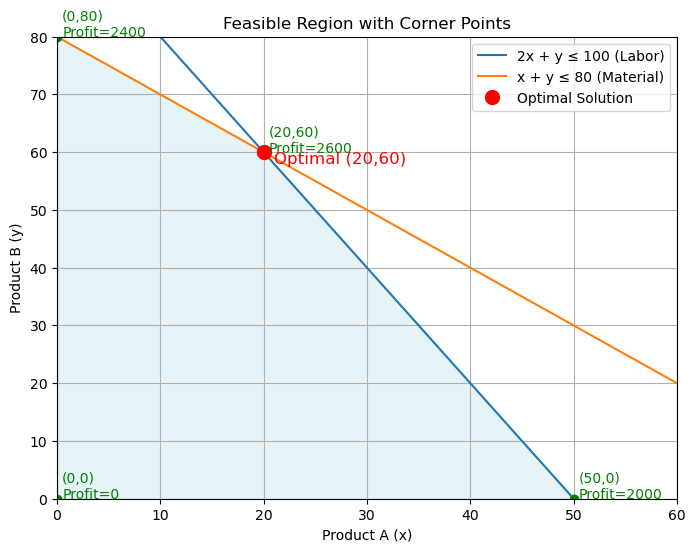

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Constraint functions
x_vals = np.linspace(0, 60, 200)
y1 = 100 - 2*x_vals        # Labor constraint
y2 = 80 - x_vals           # Material constraint

# Feasible region boundaries
y_min = np.minimum(y1, y2)
y_min = np.maximum(y_min, 0)

# Calculate corner points
points = [
    (0, 0),                # Origin
    (0, min(100, 80)),     # y-axis intercept
    (50, 0),               # From 2x + y = 100 → (50,0)
    (80, 0),               # From x + y = 80 → (80,0) (not feasible due to labor)
    (20, 60)               # Intersection of both constraints
]

# Filter feasible points
feasible_points = []
for x, y in points:
    if 2*x + y <= 100 and x + y <= 80 and x >= 0 and y >= 0:
        feasible_points.append((x, y))

# Plot feasible region
plt.figure(figsize=(8,6))
plt.plot(x_vals, y1, label=r'2x + y ≤ 100 (Labor)')
plt.plot(x_vals, y2, label=r'x + y ≤ 80 (Material)')
plt.fill_between(x_vals, y_min, 0, where=(y_min>0), alpha=0.3, color='lightblue')

# Plot feasible points
for (x, y) in feasible_points:
    profit = 40*x + 30*y
    plt.plot(x, y, 'go')
    plt.text(x+0.5, y, f'({x:.0f},{y:.0f})\nProfit={profit:.0f}', fontsize=10, color='green')

# Highlight optimal solution
opt_x, opt_y = 20, 60
plt.plot(opt_x, opt_y, 'ro', markersize=10, label='Optimal Solution')
plt.text(opt_x+1, opt_y-2, f'Optimal ({opt_x},{opt_y})', color='red', fontsize=12)

# Labels and legend
plt.xlim(0, 60)
plt.ylim(0, 80)
plt.xlabel('Product A (x)')
plt.ylabel('Product B (y)')
plt.title('Feasible Region with Corner Points')
plt.legend()
plt.grid(True)
plt.show()


- Table of Corner Points & Profits

In [14]:
import pandas as pd

# Define feasible corner points again
corner_points = [
    (0, 0),
    (0, 80),     # from material constraint
    (50, 0),     # from labor constraint
    (20, 60)     # intersection of both constraints
]

# Filter feasible ones
feasible = []
for x, y in corner_points:
    if 2*x + y <= 100 and x + y <= 80 and x >= 0 and y >= 0:
        profit = 40*x + 30*y
        feasible.append([x, y, profit])

# Create DataFrame
df = pd.DataFrame(feasible, columns=["Product A (x)", "Product B (y)", "Profit"])

# Highlight the maximum profit row
df.style.highlight_max(subset=["Profit"], color="lightgreen")


,Product A (x),Product B (y),Profit
0,0,0,0
1,0,80,2400
2,50,0,2000
3,20,60,2600


# 📌 Conclusion

The Production Planning Optimization model successfully identified the best allocation of resources to maximize profit.

- ✅ **Optimal Solution**: Produce **20 units of Product A** and **60 units of Product B**  
- ✅ **Maximum Profit**: **$2600**
- ✅ **Resource Utilization**:
  - Labor: Fully used (100 hours)
  - Raw Materials: Fully used (80 units)

Both constraints were binding, meaning resources were fully utilized without any wastage.  
The feasible region and the profit table confirm that no other production plan yields a higher profit.  

📌 **Key Insight**:  
To further increase profit, the company would need to expand its resource capacity — either by adding more labor hours or acquiring additional raw materials.
